# EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Dataset/train.xlsx")

print("Number of records: ", len(df))

Number of records:  2000


In [5]:
# As shown in the Preprocessing stage, we only have a few missing values in the dataset
# Therefore we can safely drop the rows with missing values
df = df.dropna()

### Heatmap To show the correlation between features

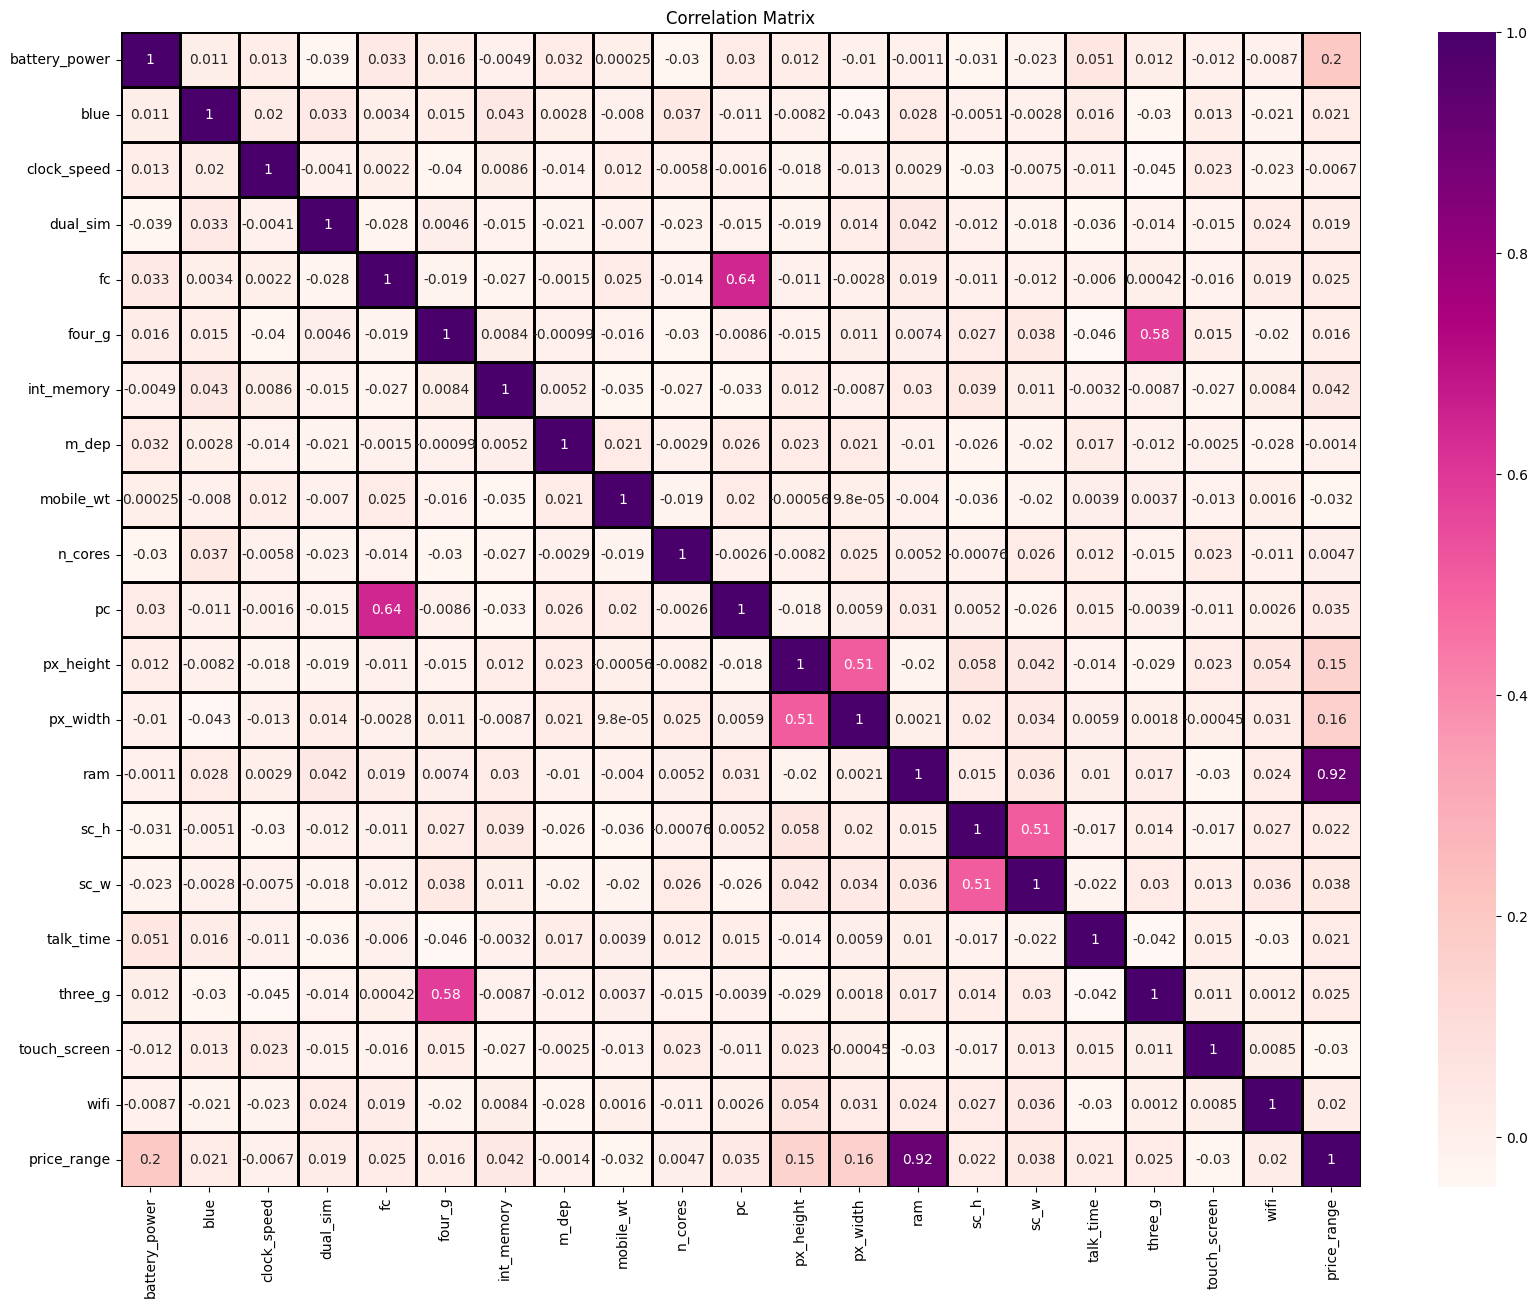

In [6]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cbar = True, annot = True, cmap='RdPu', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()


### **Important Observations:**

#### 1. RAM is the most closely related feature to price_range (0.92). It has a very strong connection, while other features like battery_power, px_width, and px_height have a much weaker relationship.

#### 2. px_width, px_height and screen_width, screen_height are closely related to each other (0.51). This is expected because they are both measurements of the screen's size, dimensions and resolution.

#### 3. The fc and pc are often similarly high-quality (0.64 correlation). Companies usually don't use a low-resolution secondary camera when the main camera is high-resolution.

#### 4. There is a high correlation between 3G and 4G (0.58). 4G technology is an improvement on 3G. This is why there's a strong connection between these two features.

#### 5. Most of the other features don't have a strong relationship with each other.

### Boxplots

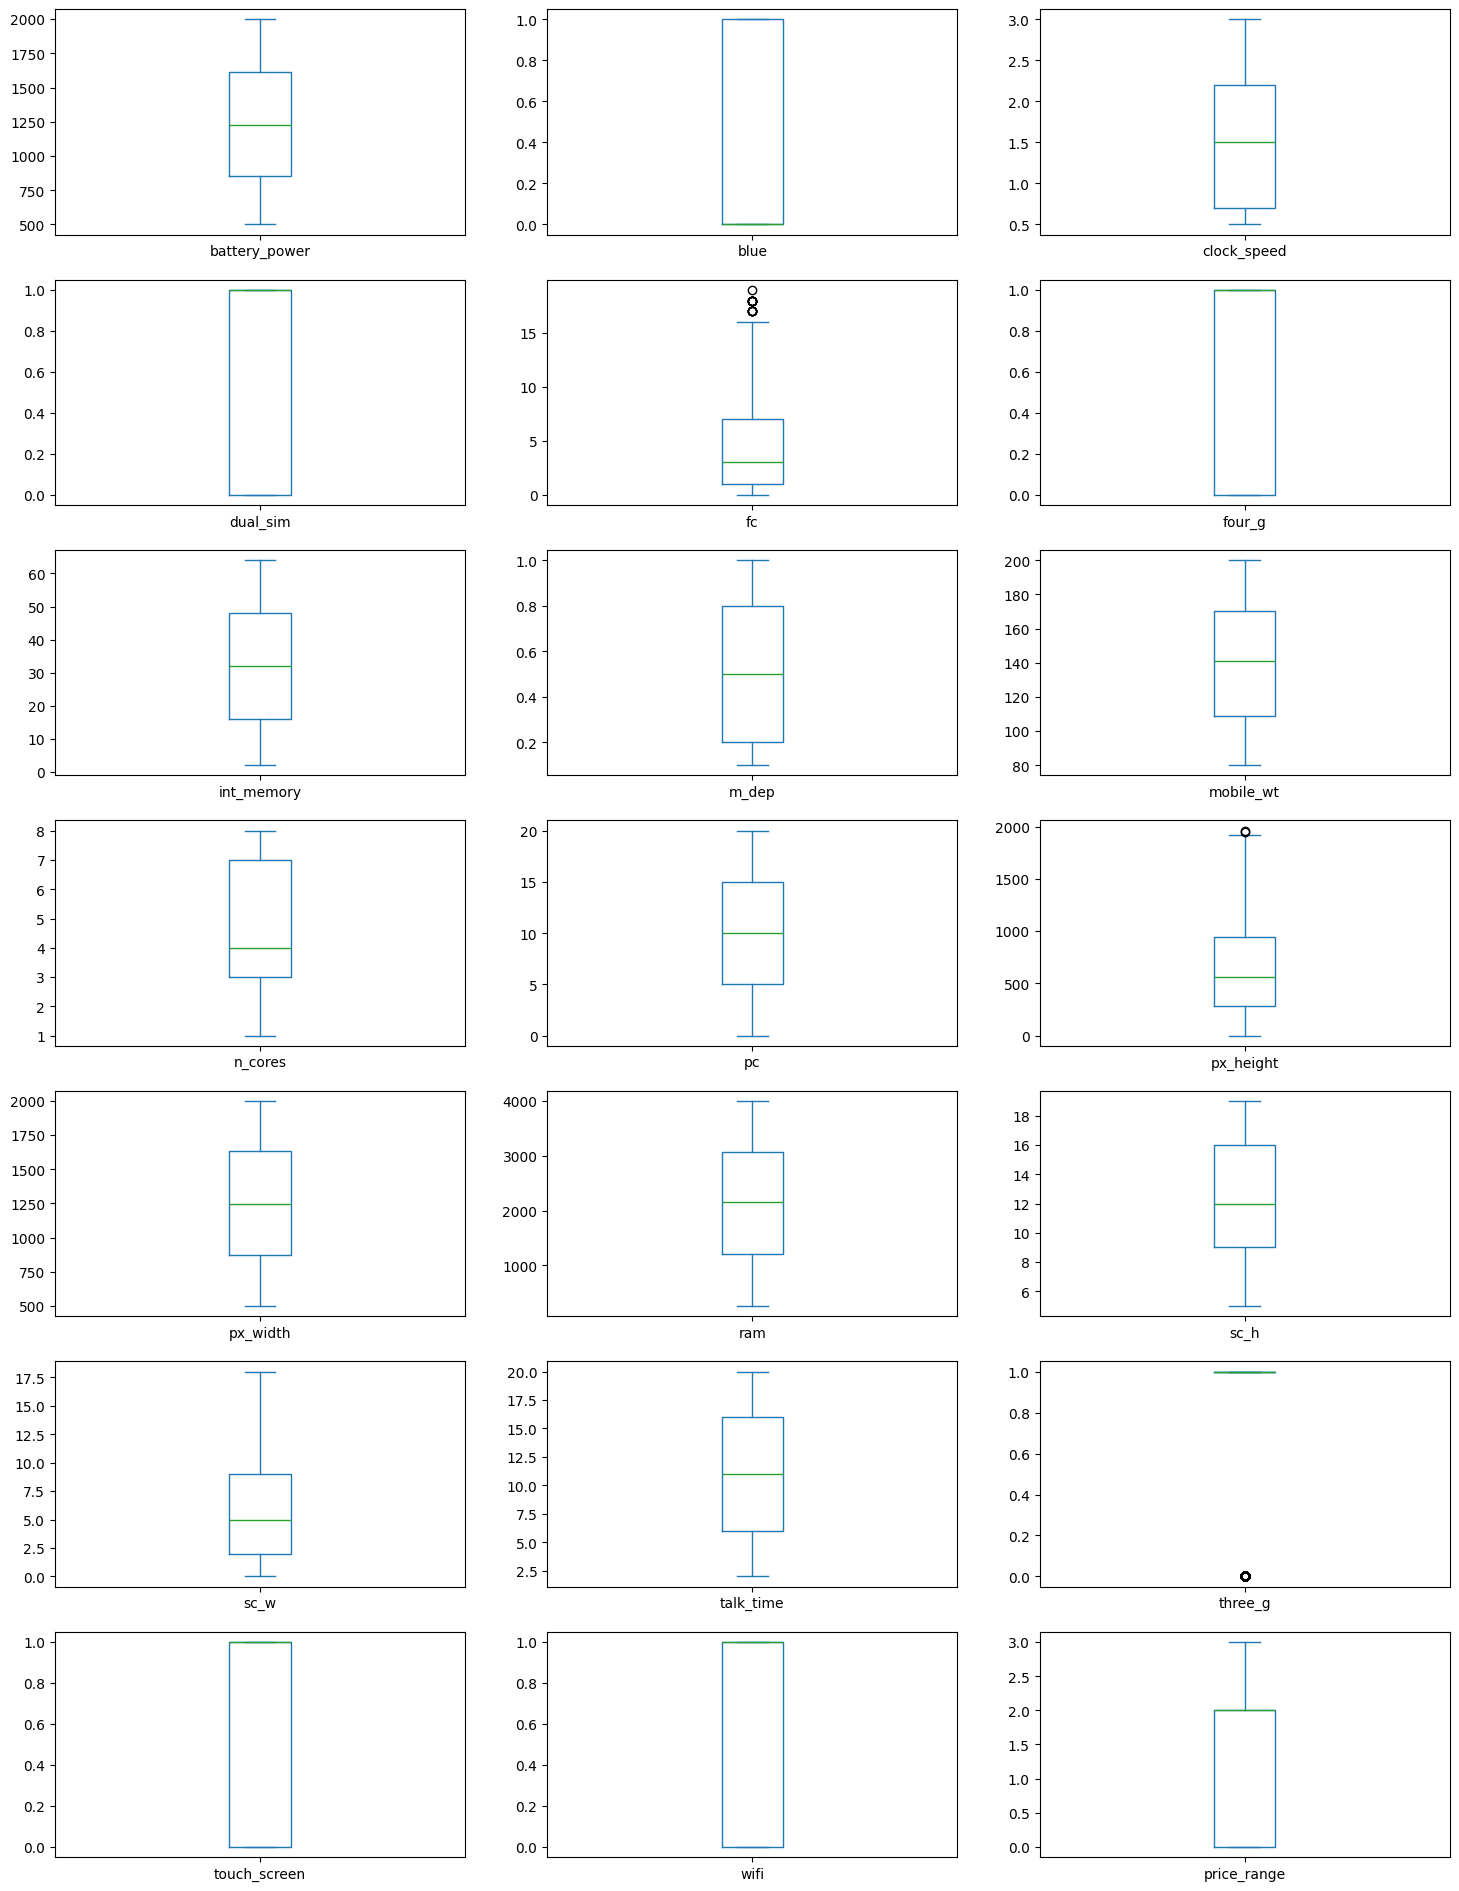

In [7]:
# Checking outliers
df.plot(kind = "box", subplots = True, figsize = (18, 24), layout = (7, 3))
plt.show()

### Conclusion:
#### There are almost no outliers, except in the fc, px_height and 3G. Which makes sense since some phones have very high resolution front cameras, and use that as their competitive advantage and phones that have no 3G are very rare nowadays, and are usually very old models

### Histograms

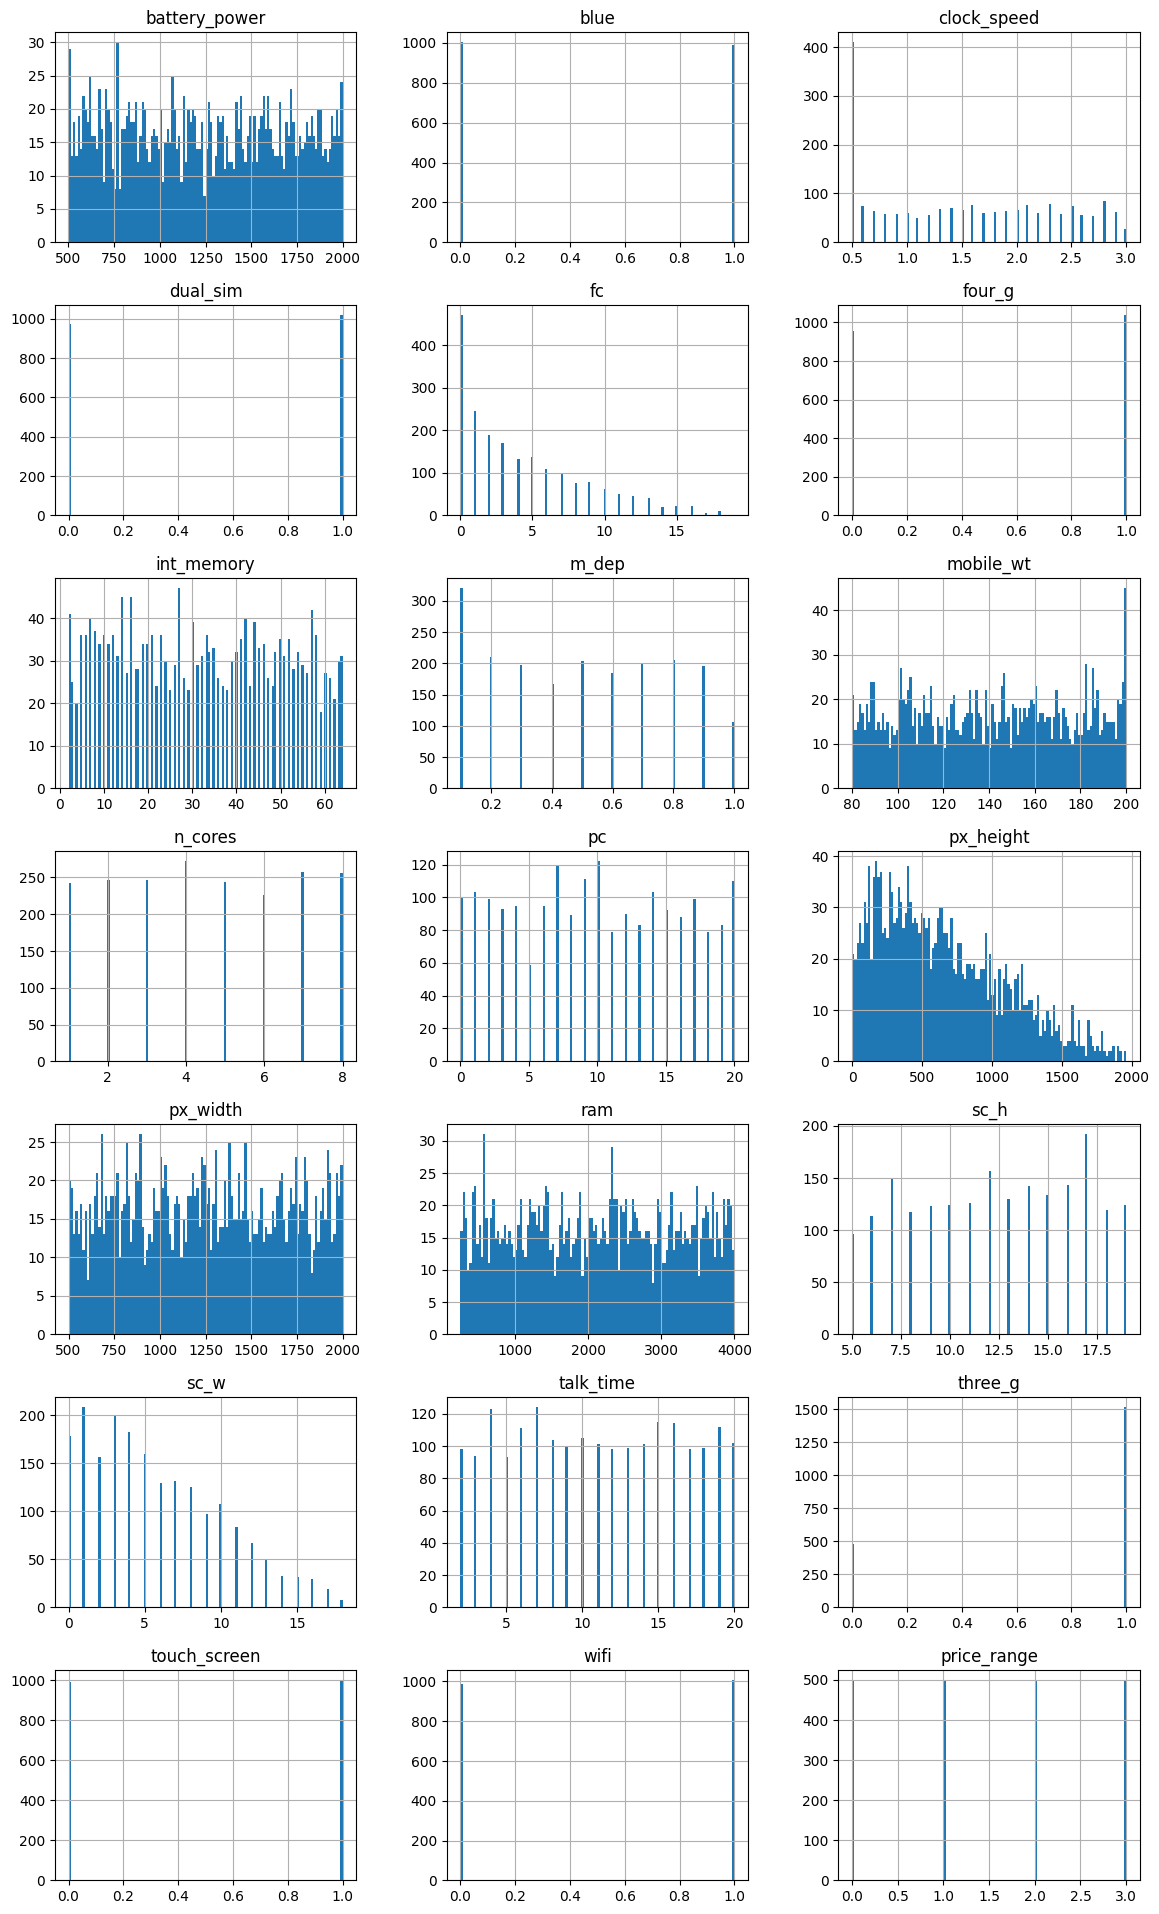

In [8]:
df.hist(bins=120, figsize=(14, 24), layout = (7, 3))
plt.show()

### Observation:
#### Data does not appear to show any irregularities, and we can clearly see the px_height outliers through the histogram

In [9]:
pd.crosstab(df['four_g'], df['three_g']).style.background_gradient(cmap="Blues")

three_g,0,1
four_g,,
0.000000,476,478
1.000000,0,1037


#### We notice that any device that supports 4G also supports 3G. This is a logical conclusion, as 4G is an upgrade to 3G

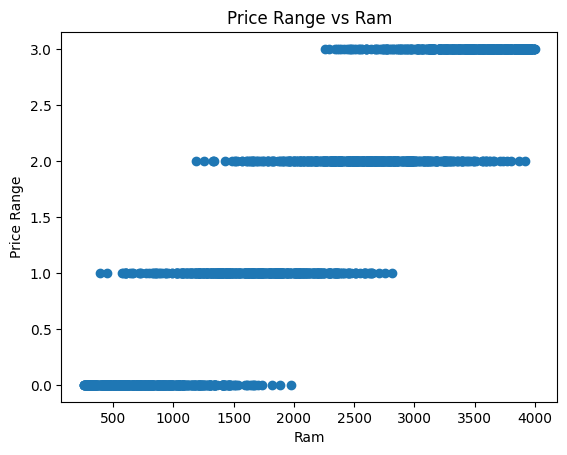

In [10]:
plt.scatter(data = df, y="price_range", x="ram")
plt.xlabel("Ram")
plt.ylabel("Price Range")
plt.title("Price Range vs Ram")
plt.show()

### Observations:
#### We can clearly see that as the ram increases, the price range increases. This is consistent with the correlation matrix we saw earlier, where they were both directly proportional, and strongly correlated

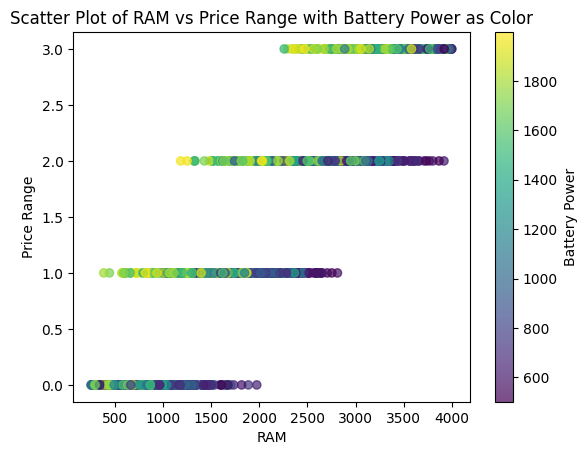

In [10]:
plt.scatter(data=df, x="ram", y="price_range", c=df["battery_power"], cmap='viridis', alpha=0.7)
plt.colorbar(label='Battery Power')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.title('Scatter Plot of RAM vs Price Range with Battery Power as Color')
plt.show()

### Observations:
#### Were we to add a 3rd dimension using the battery power, we would quickly notice that the battery power decreases as ram increases, which is quite intuitive, as a stronger processor would deplete the battery faster. This might also be a result of attempting to reduce the price a bit by using a lower quality battery, as some sort of trade-off.

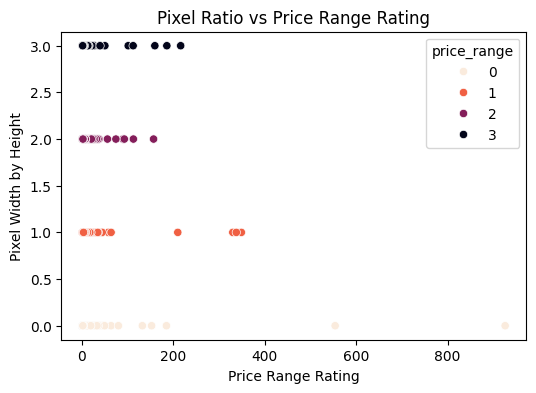

In [11]:
# plot price_range vs pixel width divided by its height
df['px_ratio'] = df['px_width'] / df['px_height']
plt.figure(figsize=(6, 4))
sns.scatterplot(x='px_ratio', y='price_range', data=df, palette='rocket_r', hue= 'price_range')
plt.title('Pixel Ratio vs Price Range Rating')
plt.xlabel('Price Range Rating')
plt.ylabel('Pixel Width by Height')
plt.show()

# drop the column so as not to affect the rest of the analysis
df = df.drop(columns = ['px_ratio'])


### Observations:
#### We notice that no phone falls in the price range of 2 or 3 with a ratio higher than 300, which is a very interesting observation. This could mean that customers are not interested in phones that have unbalanced ratios between width and height.

### Conclusion

#### 1- The amount of RAM in a phone is the biggest factor in determining its price. More RAM means a higher price.

#### 2- To keep costs down, the battery life can be slightly reduced. This will still allow the phone to be used for a decent amount of time, but it will significantly reduce the cost.

#### 3- Some features are closely related. For example, 3G and 4G technology are similar, and the front and back cameras often have similar resolutions.

#### 4- The ratio between the height and width of the phone is also a factor in determining the price range, as we saw that no phone with a ratio higher than 300 fell in the price range of 2 or 3.
